In [48]:
#Import libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report

In [49]:
#Read data and view data's information
#We have 10 column and 69 rows

filepath = 'https://raw.githubusercontent.com/naphatsiri/Logistic-Regression-Analysis/refs/heads/main/Smartphone_eng_cleaned.csv'
df = pd.read_csv(filepath)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           69 non-null     object
 1   Age              69 non-null     object
 2   Occupation       69 non-null     object
 3   Salary           69 non-null     object
 4   OperationSystem  69 non-null     object
 5   Game             69 non-null     object
 6   Socialmedia      69 non-null     object
 7   Entertainment    69 non-null     object
 8   Photo/Video      69 non-null     object
 9   Brands           69 non-null     object
dtypes: object(10)
memory usage: 5.5+ KB


In [50]:
#Transform data into One-hot encoder
#in order to analyze in Logistic Regression model

df_encoded = pd.get_dummies(df, columns=['Gender','Age','Occupation',
                                         'Salary','Game','Socialmedia',
                                         'Entertainment','Photo/Video','Brands'],dtype=int)

df_encoded.head()

,OperationSystem,Gender_Female,Gender_Male,Age_21-25 yrs,Age_26-30 yrs,Age_31-35 yrs,Age_36-40 yrs,Occupation_College_Student,Occupation_Freelancer,Occupation_Gov_Official,...,Photo/Video_Most often,Photo/Video_Often,Photo/Video_Quite little,Brands_Don't know yet,Brands_Google,Brands_Iphone,Brands_Nokia,Brands_Oneplus,Brands_Oppo,Brands_Samsung
0,IOS,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,IOS,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,IOS,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,IOS,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,IOS,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [51]:
#Define the features and target variable

X = df_encoded.drop('OperationSystem', axis=1)
y = df_encoded['OperationSystem']

In [52]:
#Split data into train and test with 70% traning size and 30% testing size

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [53]:
#Fit LogisticRegression to the data using X_train and y_train

model = LogisticRegression()
model.fit(X_train, y_train)

#Once we have our model, we use it to predict our data (X_test)
y_predict = model.predict(X_test)


In [54]:
#Result : Confusion Matrix

from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, y_predict)

print(f"Confusion Matrix : {conf_matrix}")

Confusion Matrix : [[ 0  2]
 [ 2 17]]


In [55]:
#Result :
#1) Classification report
#2) Model score

print('\t\t-----Classification report-----')
print(classification_report(y_test, y_predict))
print('\t\t-----Classification report-----\n')
print(f"Model score : {model.score(X_test, y_test):.4f}")

		-----Classification report-----
              precision    recall  f1-score   support

     Android       0.00      0.00      0.00         2
         IOS       0.89      0.89      0.89        19

    accuracy                           0.81        21
   macro avg       0.45      0.45      0.45        21
weighted avg       0.81      0.81      0.81        21

		-----Classification report-----

Model score : 0.8095


In [ ]:
#Import SHAP
!pip install shap
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.3 MB/s eta 0:00:00


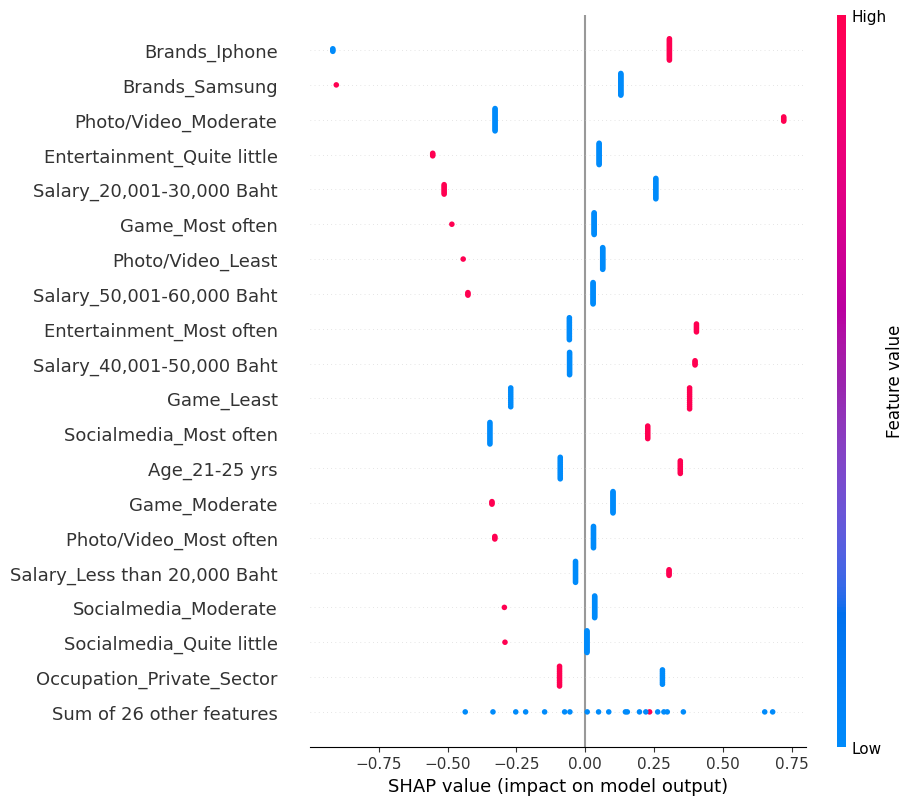

In [56]:
#Result : Ranks features by their importance

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values,order=shap_values.abs.max(0),max_display=20)

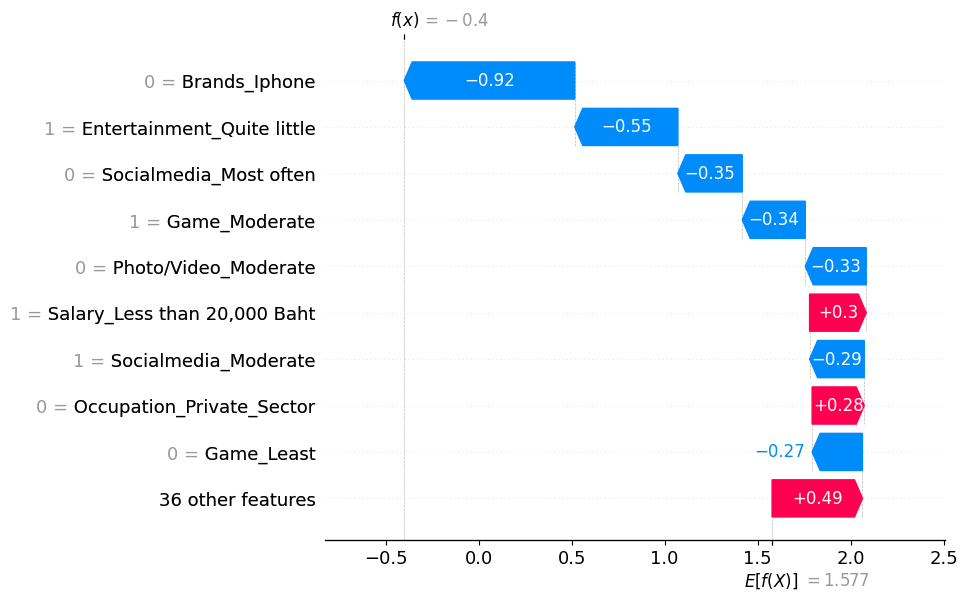

In [57]:
#Result : Analyze one sample (random) from test set

randon_sample = X_test.sample(n=1,random_state=42)

predictions = model.predict(randon_sample)

explainer = shap.Explainer(model, X_train)
shap_values = explainer(randon_sample)

shap.plots.waterfall(shap_values[0])
